## After Running AnalysisPipeline.ipynb

In [2]:
## If starting over Kernel:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import nelpy as nel
import nelpy.plotting as npl
import jagular as jag
import ghostipy as gsp
from numpy.fft import fft
warnings.simplefilter("ignore", UserWarning)
import logging
import logging.config
logging.basicConfig(level=logging.ERROR) 
import seaborn as sns

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'

rec_list = ['preFamSleep', 'postTestSleep']

# path = prefix + 'lfp.npy'
# lfp = np.load(path, allow_pickle=True).item()
# print("lfp")
# print(lfp)

# path = prefix + 'denoised_epochs.npy'
# denoised = np.load(path, allow_pickle=True).item()
# print("\ndenoised")
# print(denoised)

# path = prefix + 'norm_pwr_td_ratio.npy'
# td_ratios = np.load(path, allow_pickle=True).item()
# print("\ntd_ratios")

# path = prefix + 'ripple_epochs.npy'
# ripple_epochs = np.load(path, allow_pickle=True).item()
# print("\nripple_epochs")
# print(ripple_epochs)

# print("\nDone")


/home/kaylavokt/nelpy/nelpy/plotting/decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


## Load Data

In [3]:
# prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'

rec_list = ['preFamSleep', 'postTestSleep']
disruption = []
control = []

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

print("Disruption ------")
print(disruption)

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

print("\nControl ----- ")
print(control)


Disruption ------
[{'preFamSleep': <EpochArray at 0x7fc9836d7160: 315 epochs> of length 34.073 seconds, 'postTestSleep': <EpochArray at 0x7fc9836d7358: 274 epochs> of length 34.164 seconds}, {'preFamSleep': <EpochArray at 0x7fc9bc4c0668: 351 epochs> of length 36.174 seconds, 'postTestSleep': <EpochArray at 0x7fc9836d7518: 265 epochs> of length 25.589 seconds}]

Control ----- 
[{'preFamSleep': <EpochArray at 0x7fc9836d7780: 330 epochs> of length 35.3004 seconds, 'postTestSleep': <EpochArray at 0x7fc98367f4e0: 342 epochs> of length 38.8967999999999999 seconds}, {'preFamSleep': <EpochArray at 0x7fc9bc4c0e48: 166 epochs> of length 19.2852 seconds, 'postTestSleep': <EpochArray at 0x7fc98367f710: 249 epochs> of length 28.49110000000000004 seconds}]


In [13]:
day1_pfs = disruption[0][rec_list[0]].lengths*1000
day1_pts = disruption[0][rec_list[1]].lengths*1000

day3_pfs = disruption[1][rec_list[0]].lengths*1000
day3_pts = disruption[1][rec_list[1]].lengths*1000

day4_pfs = control[0][rec_list[0]].lengths*1000
day4_pts = control[0][rec_list[1]].lengths*1000

day5_pfs = control[1][rec_list[0]].lengths*1000
day5_pts = control[1][rec_list[1]].lengths*1000

## Plot Data

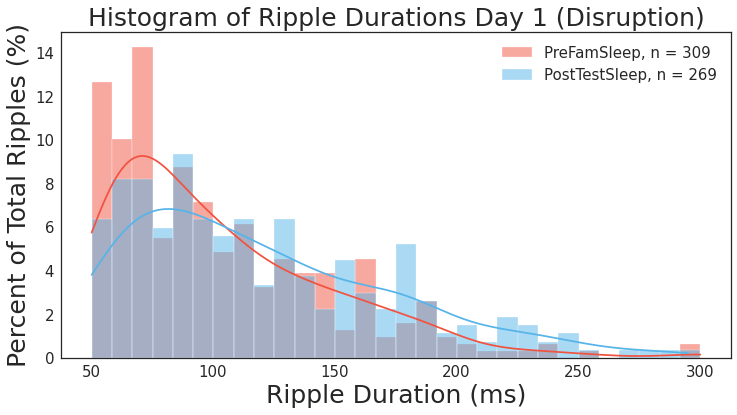

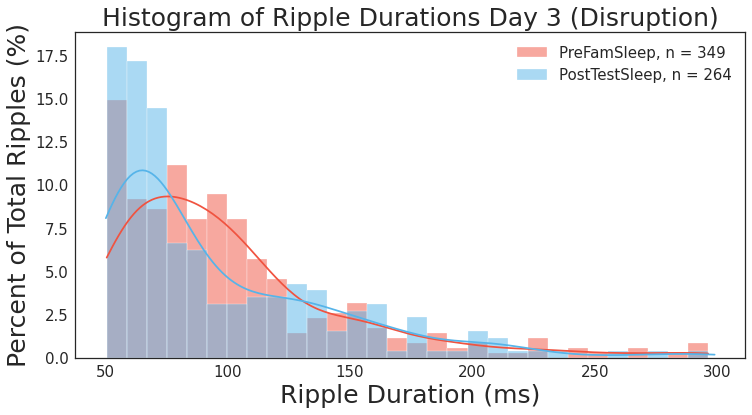

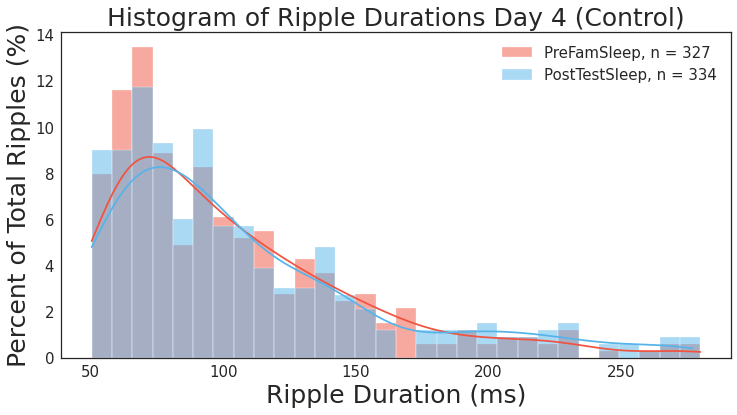

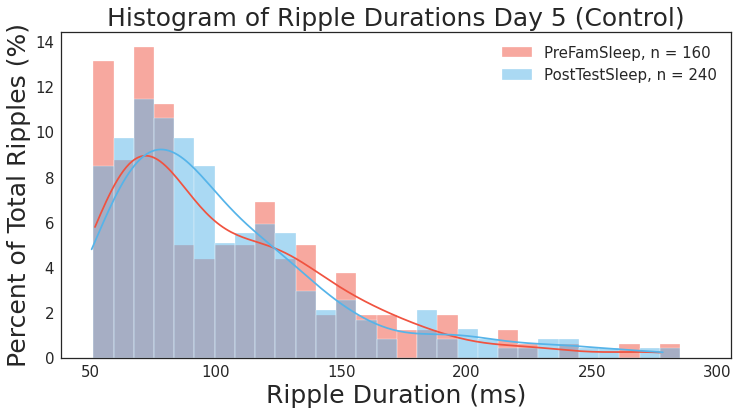

In [32]:
save_path = "/home/kaylavokt/Desktop/Whrath/figs/duration_"

day = "Day 1 (Disruption)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day1_pfs < 300)
bins = np.histogram_bin_edges(day1_pfs[limit], bins=30)
sns.histplot(day1_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(day1_pfs[limit])))

limit = np.where(day1_pts < 300)
sns.histplot(day1_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(day1_pts[limit])))

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day1.png')
plt.show()

day = "Day 3 (Disruption)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day3_pfs < 300)
bins = np.histogram_bin_edges(day3_pfs[limit], bins=30)
sns.histplot(day3_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(day3_pfs[limit])))

limit = np.where(day3_pts < 300)
sns.histplot(day3_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(day3_pts[limit])))

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day3.png')
plt.show()

day = "Day 4 (Control)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day4_pfs < 300)
bins = np.histogram_bin_edges(day4_pfs[limit], bins=30)
sns.histplot(day4_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(day4_pfs[limit])))

limit = np.where(day4_pts < 300)
sns.histplot(day4_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(day4_pts[limit])))

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day4.png')
plt.show()

day = "Day 5 (Control)"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(day5_pfs < 300)
bins = np.histogram_bin_edges(day3_pfs[limit], bins=30)
sns.histplot(day5_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(day5_pfs[limit])))

limit = np.where(day5_pts < 300)
sns.histplot(day5_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(day5_pts[limit])))

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'day5.png')
plt.show()


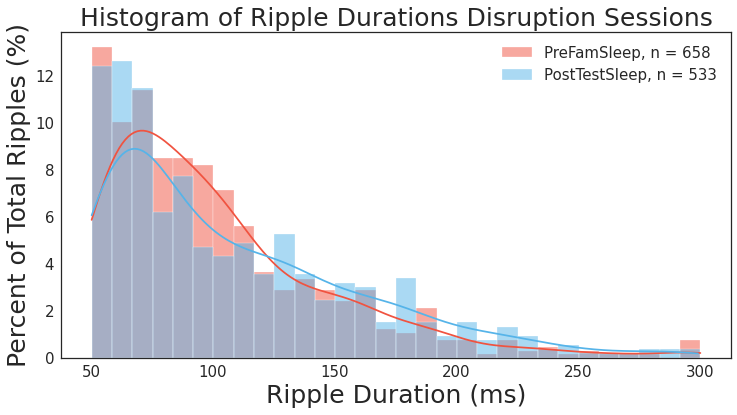

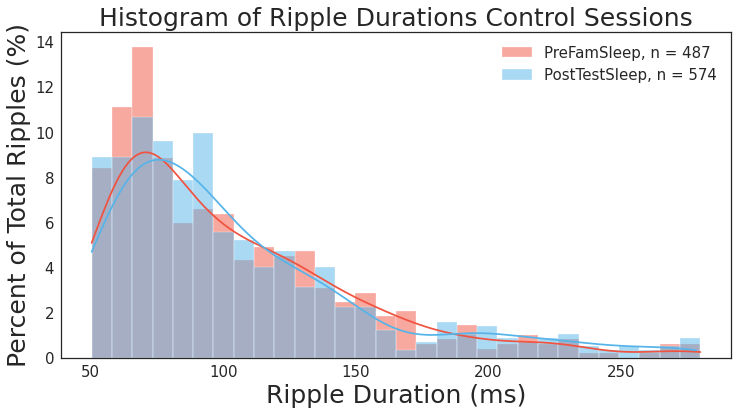

In [37]:
save_path = "/home/kaylavokt/Desktop/Whrath/figs/duration_"
disruption_data_pfs = np.concatenate((day1_pfs,day3_pfs), axis=None)
disruption_data_pts = np.concatenate((day1_pts,day3_pts), axis=None)

day = "Disruption Sessions"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(disruption_data_pfs < 300)
bins = np.histogram_bin_edges(disruption_data_pfs[limit], bins=30)
sns.histplot(disruption_data_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(disruption_data_pfs[limit])))

limit = np.where(disruption_data_pts < 300)
sns.histplot(disruption_data_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(disruption_data_pts[limit])))

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'disruption_sessions.png')
plt.show()


control_data_pfs = np.concatenate((day4_pfs,day5_pfs), axis=None)
control_data_pts = np.concatenate((day4_pts,day5_pts), axis=None)

day = "Control Sessions"
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

limit = np.where(control_data_pfs < 300)
bins = np.histogram_bin_edges(control_data_pfs[limit], bins=30)
sns.histplot(control_data_pfs[limit], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(control_data_pfs[limit])))

limit = np.where(control_data_pts < 300)
sns.histplot(control_data_pts[limit], bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(control_data_pts[limit])))

ax.set_title("Histogram of Ripple Durations " + day)
ax.set_xlabel("Ripple Duration (ms)")
ax.set_ylabel("Percent of Total Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'control_sessions.png')
plt.show()



## Other Stuff

In [15]:
sum(ripple_epochs['preFamSleep'].lengths)


np.sum(np.diff(denoised['preFamSleep'].support.data, axis=1))

1199.0185999999999

In [21]:
data = denoised['preFamSleep'][0]
fs = 3000

ripples = ripple_epochs[rec_list[0]]
signal = lfp['preFamSleep']
data = signal[ripples[0]].data[0]

coefs_cwt, _, f_cwt, t_cwt, _ = gsp.cwt(data, fs=fs,freq_limits=[100, 400])

# # xctr = np.argmax(coefs_cwt.max(axis=0))
# # yctr = np.argmax(coefs_cwt.max(axis=1))

# print(xctr)

## Look at Ripples in Different Analysis

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


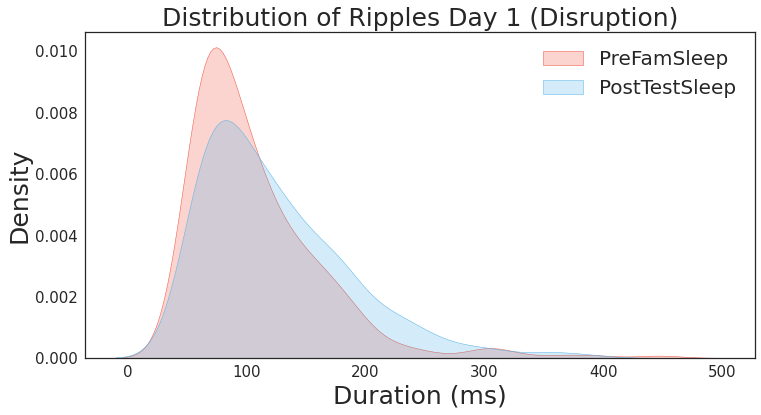

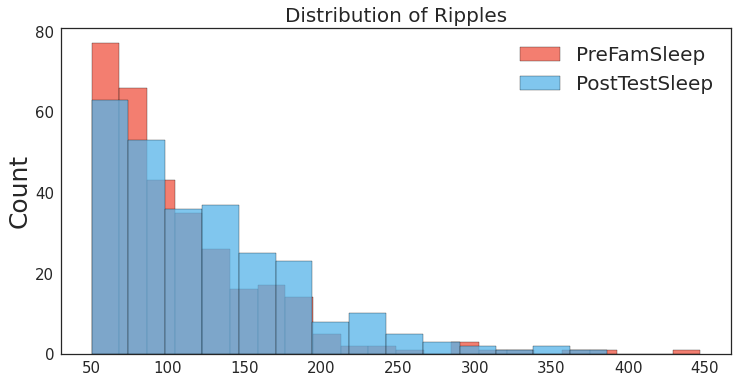

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


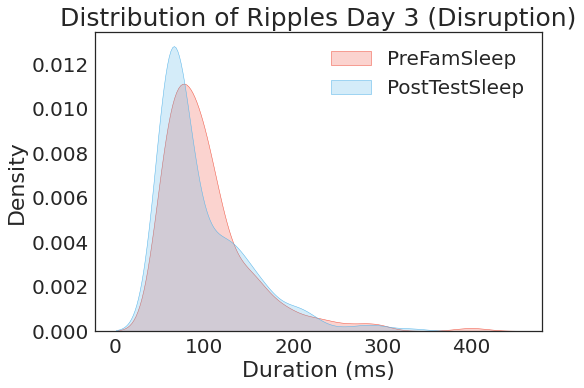

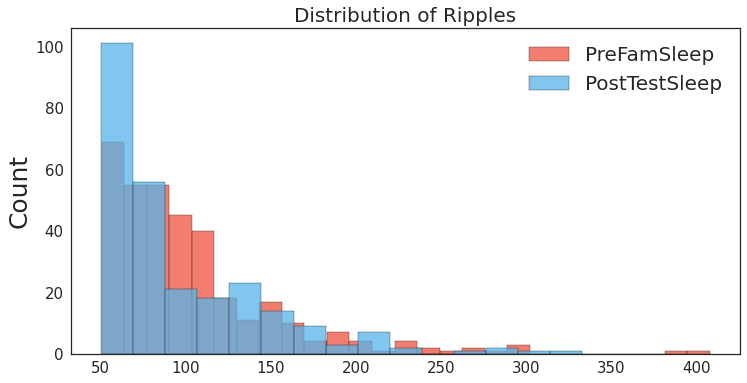

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


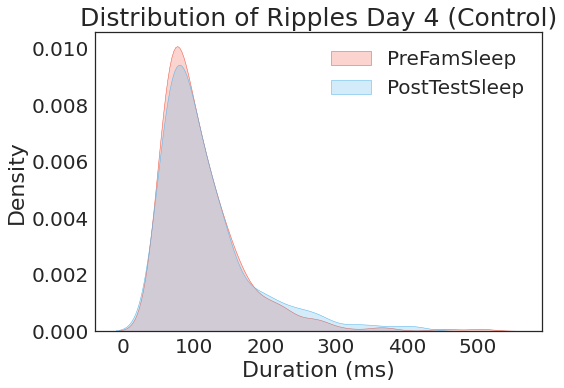

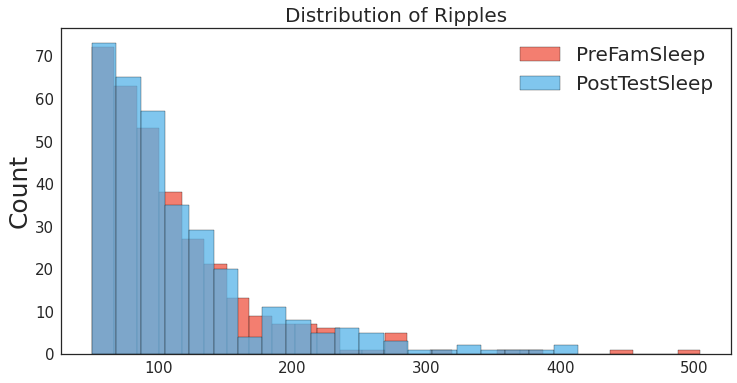

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


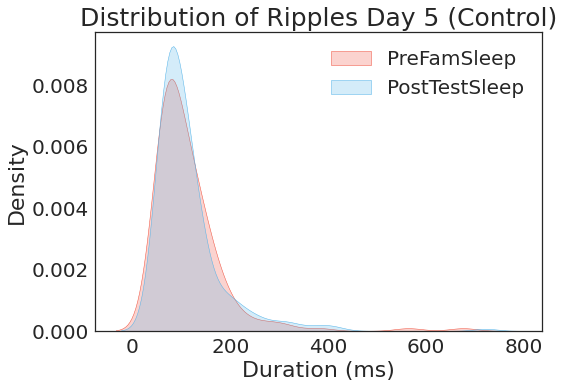

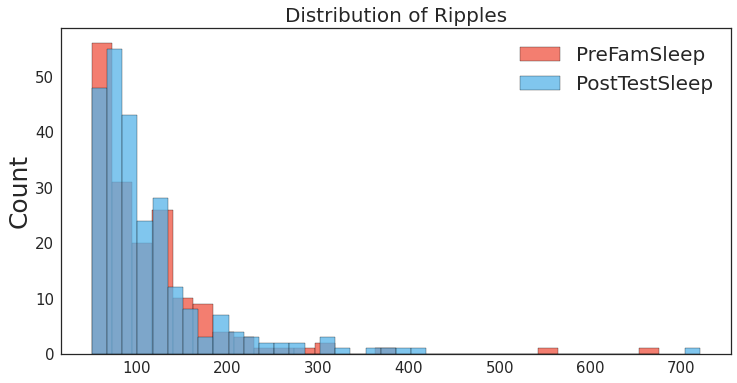

In [15]:
## Plot 

# Create Histograms for Each Session
# Distribution of All Ripples
import seaborn as sns

## Day 1
ripples = disruption[0][rec_list[0]]
ripples1 = disruption[0][rec_list[1]]

ax = plt.gca()
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(ripples.lengths*1000,color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripples1.lengths*1000,color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripples Day 1 (Disruption)")
ax.set_xlabel("Duration (ms)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

# Histogram

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'axes.titlesize':20}))   
sns.histplot(ripples.lengths*1000, color=npl.colors.sweet.red, label='PreFamSleep')
sns.histplot(ripples1.lengths*1000, color=npl.colors.sweet.blue, label='PostTestSleep')
ax.set_title("Distribution of Ripples")
plt.legend()
plt.show()

## Day 3

ripples = disruption[1][rec_list[0]]
ripples1 = disruption[1][rec_list[1]]

ax = plt.gca()
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(ripples.lengths*1000,color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripples1.lengths*1000,color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripples Day 3 (Disruption)")
ax.set_xlabel("Duration (ms)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

# Histogram

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'axes.titlesize':20}))   
sns.histplot(ripples.lengths*1000, color=npl.colors.sweet.red, label='PreFamSleep')
sns.histplot(ripples1.lengths*1000, color=npl.colors.sweet.blue, label='PostTestSleep')
ax.set_title("Distribution of Ripples")
plt.legend()
plt.show()


## Day 4
ripples = control[0][rec_list[0]]
ripples1 = control[0][rec_list[1]]

ax = plt.gca()
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(ripples.lengths*1000,color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripples1.lengths*1000,color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripples Day 4 (Control)")
ax.set_xlabel("Duration (ms)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

# Histogram

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'axes.titlesize':20}))   
sns.histplot(ripples.lengths*1000, color=npl.colors.sweet.red, label='PreFamSleep')
sns.histplot(ripples1.lengths*1000, color=npl.colors.sweet.blue, label='PostTestSleep')
ax.set_title("Distribution of Ripples")
plt.legend()
plt.show()

## Day 5
ripples = control[1][rec_list[0]]
ripples1 = control[1][rec_list[1]]

ax = plt.gca()
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(ripples.lengths*1000,color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripples1.lengths*1000,color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripples Day 5 (Control)")
ax.set_xlabel("Duration (ms)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

# Histogram

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'axes.titlesize':20}))   
sns.histplot(ripples.lengths*1000, color=npl.colors.sweet.red, label='PreFamSleep')
sns.histplot(ripples1.lengths*1000, color=npl.colors.sweet.blue, label='PostTestSleep')
ax.set_title("Distribution of Ripples")
plt.legend()
plt.show()

In [14]:
# Histogram

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'axes.titlesize':20}))   
sns.histplot(ripples.lengths*1000, color=npl.colors.sweet.red, label='PreFamSleep')
sns.histplot(ripples1.lengths*1000, color=npl.colors.sweet.blue, label='PostTestSleep')
ax.set_title("Distribution of Ripples")
plt.legend()
plt.show()

NameError: name 'ctr_frequency' is not defined

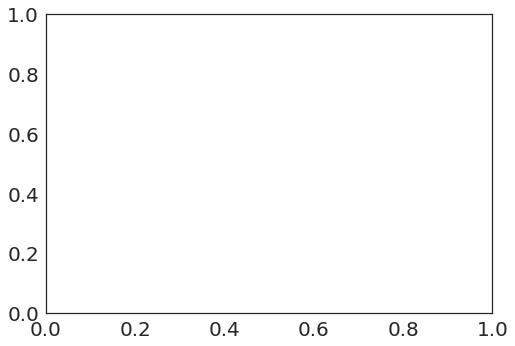

In [16]:
ax = plt.gca()
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(ctr_frequency,color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripples Day 1 (Disruption)")
ax.set_xlabel("Duration (ms)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

## Calculate Ripple Rates

In [14]:
rec_list = ['preFamSleep', 'postTestSleep']
disruption = []
control = []

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
disruption.append(ripple_epochs)

print("Disruption ------")

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'
path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
control.append(ripple_epochs)

print("\nControl ----- ")
    
num_ripples = []
num_ripples.append(len(disruption[0][rec_list[0]].lengths))
num_ripples.append(len(disruption[0][rec_list[1]].lengths))

num_ripples.append(len(disruption[1][rec_list[0]].lengths))
num_ripples.append(len(disruption[1][rec_list[1]].lengths))

num_ripples.append(len(control[0][rec_list[0]].lengths))
num_ripples.append(len(control[0][rec_list[1]].lengths))

num_ripples.append(len(control[1][rec_list[0]].lengths))
num_ripples.append(len(control[1][rec_list[1]].lengths))

print("Num Ripples", num_ripples)
    
    
rec_list = ['preFamSleep', 'postTestSleep']
disruption = []
control = []

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
disruption.append(time_dur)

prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
disruption.append(time_dur)

print("Disruption ------")

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
control.append(time_dur)

prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'
path = prefix + 'denoised_epochs.npy'
time_dur = np.load(path, allow_pickle=True).item()
control.append(time_dur)

print("\nControl ----- ")
time_durations = []
time_durations.append(np.sum(np.diff(disruption[0][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(disruption[0][rec_list[1]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(disruption[1][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(disruption[1][rec_list[1]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[0][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[0][rec_list[1]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[1][rec_list[0]].support.data, axis=1)))
time_durations.append(np.sum(np.diff(control[1][rec_list[1]].support.data, axis=1)))
    
    
print("Time Durations", time_durations)
    
ripple_rates = np.array(num_ripples)/np.array(time_durations)
# day1_pfs, day1_pts, day3_pfs, day3_pts, day4_pfs, day4_pts, day5_pfs, day5_pts



Disruption ------

Control ----- 
Num Ripples [315, 274, 351, 265, 330, 342, 166, 249]
Disruption ------

Control ----- 
Time Durations [1226.9803333333334, 1235.2357666666667, 1198.065, 1201.3120666666666, 1194.7880333333333, 1241.2985666666664, 1191.6400333333333, 1236.9873999999998]


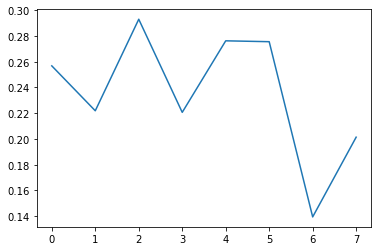

In [16]:
plt.plot(ripple_rates)
plt.show()